Data is filthy.

# Extraction, first look

In [16]:
import pandas as pd

df = pd.read_csv("choco_wprice.csv", encoding = "ANSI")

df.describe()

,REF,Review.Date,Cocoa.Percent,Rating,Bar.Price
count,1852.000000,1852.000000,1852.000000,1587.000000,1296.000000
mean,1065.007019,2012.469222,71.697354,3.264650,5.455234
std,568.299301,2.992810,6.260081,0.475335,2.569743
min,5.000000,2006.000000,42.000000,1.000000,1.004188
25%,600.000000,2010.000000,70.000000,3.000000,3.277589
50%,1099.000000,2013.000000,70.000000,3.250000,5.411294
75%,1546.000000,2015.000000,75.000000,3.500000,7.654216
max,2008.000000,2017.000000,100.000000,5.000000,9.994641


# Transformation

 • Deleting missing values

In [17]:
# Let's see how many missing values per attribute we have.
df.isnull().sum()

Company                   0
Specific.Bean.Origin      0
REF                       0
Review.Date               0
Cocoa.Percent             0
Company.Location          0
Rating                  265
Bean.Type               938
Broad.Bean.Origin        74
Bar.Price               556
dtype: int64

In [18]:
# Now, let's see the proportion of these values.
# Rule of thumb, an attribute with > 50, maybe 60% missing data is a candidate for deletion in a static dataset

missing_values_proportion = df.isnull().mean()
missing_values_proportion = df.apply(lambda x: (x == "").sum() + x.isnull().sum()) / len(df)
print(missing_values_proportion)

Company                 0.000000
Specific.Bean.Origin    0.000000
REF                     0.000000
Review.Date             0.000000
Cocoa.Percent           0.000000
Company.Location        0.000000
Rating                  0.143089
Bean.Type               0.506479
Broad.Bean.Origin       0.039957
Bar.Price               0.300216
dtype: float64


In [19]:
# # For the sake of practice, we'll delete attributes missing 50% or more values

# atts_to_delete <- which(missing_values_proportion >= 0.5)
# choco <- choco[, -atts_to_delete]

atts_to_delete = missing_values_proportion[missing_values_proportion >= 0.5].index
df = df.drop(columns=atts_to_delete)

,Company,Specific.Bean.Origin,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Broad.Bean.Origin,Bar.Price
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome,2.535807
1,A. Morin,Kpime,1676,2015,70.0,France,NaN,Togo,5.997822
2,A. Morin,Panama,1011,2013,70.0,France,NaN,Panama,NaN
3,A. Morin,Madagascar,1011,2013,70.0,France,3.00,Madagascar,7.014562
4,A. Morin,Brazil,1011,2013,70.0,France,3.25,Brazil,5.889096


 • Replacing missing values

In [11]:
# Are there any attributes whose values can be estimated?

# We could replace with 0, replace with mean, or replace with median.

# For Bar.Price, the mean is the most proper replacement:

# choco$Bar.Price[is.na(choco$Bar.Price)] <- mean(choco$Bar.Price, na.rm = TRUE)

# head(choco)



,Company,Specific.Bean.Origin,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Broad.Bean.Origin,Bar.Price
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,A. Morin,Agua Grande,1876,2016,63,France,3.75,Sao Tome,2.535807
2,A. Morin,Kpime,1676,2015,70,France,NA,Togo,5.997822
3,A. Morin,Panama,1011,2013,70,France,NA,Panama,5.455234
4,A. Morin,Madagascar,1011,2013,70,France,3.00,Madagascar,7.014562
5,A. Morin,Brazil,1011,2013,70,France,3.25,Brazil,5.889096
6,A. Morin,Equateur,1011,2013,70,France,3.75,Ecuador,2.836863


 • Replacing missing values stratigraphically

In [34]:
sum(is.na(choco$Rating)) # Missing ratings

# Estimating missing ratings according to median by company:

per_comp = aggregate(choco$Rating, by=list(choco$Company), na.rm=TRUE, median)
colnames(per_comp) = c("Company", "MRating")

# Replacing a few values manually

choco$Rating[is.na(choco$Rating) & choco$Company == "Vicuna"] <- per_comp$Rating[per_comp$Company == "Vicuna"]
choco$Rating[is.na(choco$Rating) & choco$Company == "Zokoko"] <- per_comp$Rating[per_comp$Company == "Zokoko"]
choco$Rating[is.na(choco$Rating) & choco$Company == "Videri"] <- per_comp$Rating[per_comp$Company == "Videri"]


choco %>% filter(Company == "Zokoko") %>% select(Rating)


[1] 265

Rating
<dbl>
3.75
3.25
3.50
3.50
3.75


# Checking out outliers

Boxplots show values more than three stdevs away from the median as outliers.

Could these really be of extremely high/low quality or simply anomalies? Judgment call!

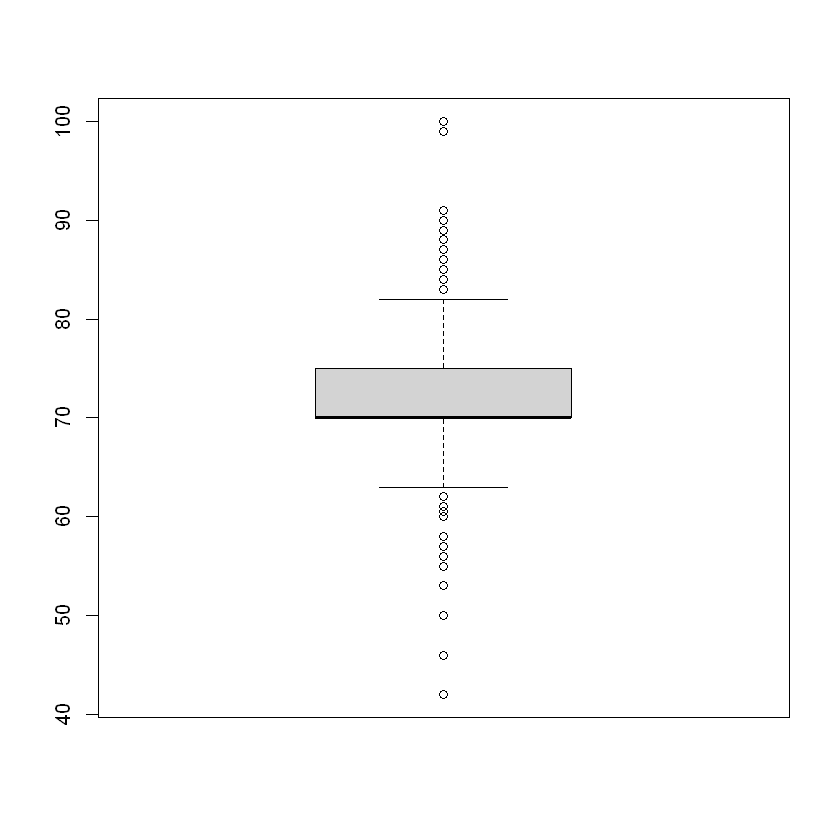

In [35]:
boxplot(choco$Cocoa.Percent)